In [1]:
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from skimage.feature import hog

In [ ]:
# Read the parquet file, this takes a while. Leave it here
dft = pl.read_parquet("Train.parquet", use_pyarrow=True, memory_map=True)

In [211]:
def restore_image_from_list(width: int, height: int, image: list) -> np.array:
    return np.array(image).reshape((height, width, 3))


def image_for_display(image: np.array) -> np.array:
    """
    Convert image to 0-255 range
    """
    return np.clip((image * 256), 0, 255).astype(np.uint8)


def create_hog_features(image):
    """
    The best parameters for the HOG features are:
            block_norm="L2-Hys",
            pixels_per_cell=(6, 6),
            cells_per_block=(2, 2),
    There appears to be no difference betwen using the RGB or LAB color space
    Therefore we will use the RGB color space
    The hog image doesn't need to be 0-255 it will work with a normalized image
    as input
    """
    # image = (image * 255).astype(np.uint8)
    # l_channel, a_channel, b_channel = cv2.split(cv2.cvtColor(image, cv2.COLOR_RGB2LAB))
    # features_lab, hog_image_lab = hog(
    #    l_channel,
    #    orientations=9,
    #    block_norm="L2-Hys",
    #    pixels_per_cell=(6, 6),
    #    cells_per_block=(2, 2),
    #    visualize=True,
    #    #channel_axis=-1
    # )
    features_rgb, hog_image_rgb = hog(
        image,
        orientations=9,
        block_norm="L2-Hys",
        pixels_per_cell=(6, 6),
        cells_per_block=(2, 2),
        visualize=True,
        channel_axis=-1,
    )
    return features_rgb, hog_image_rgb

Text(0.5, 1.0, 'HOG features RGB')

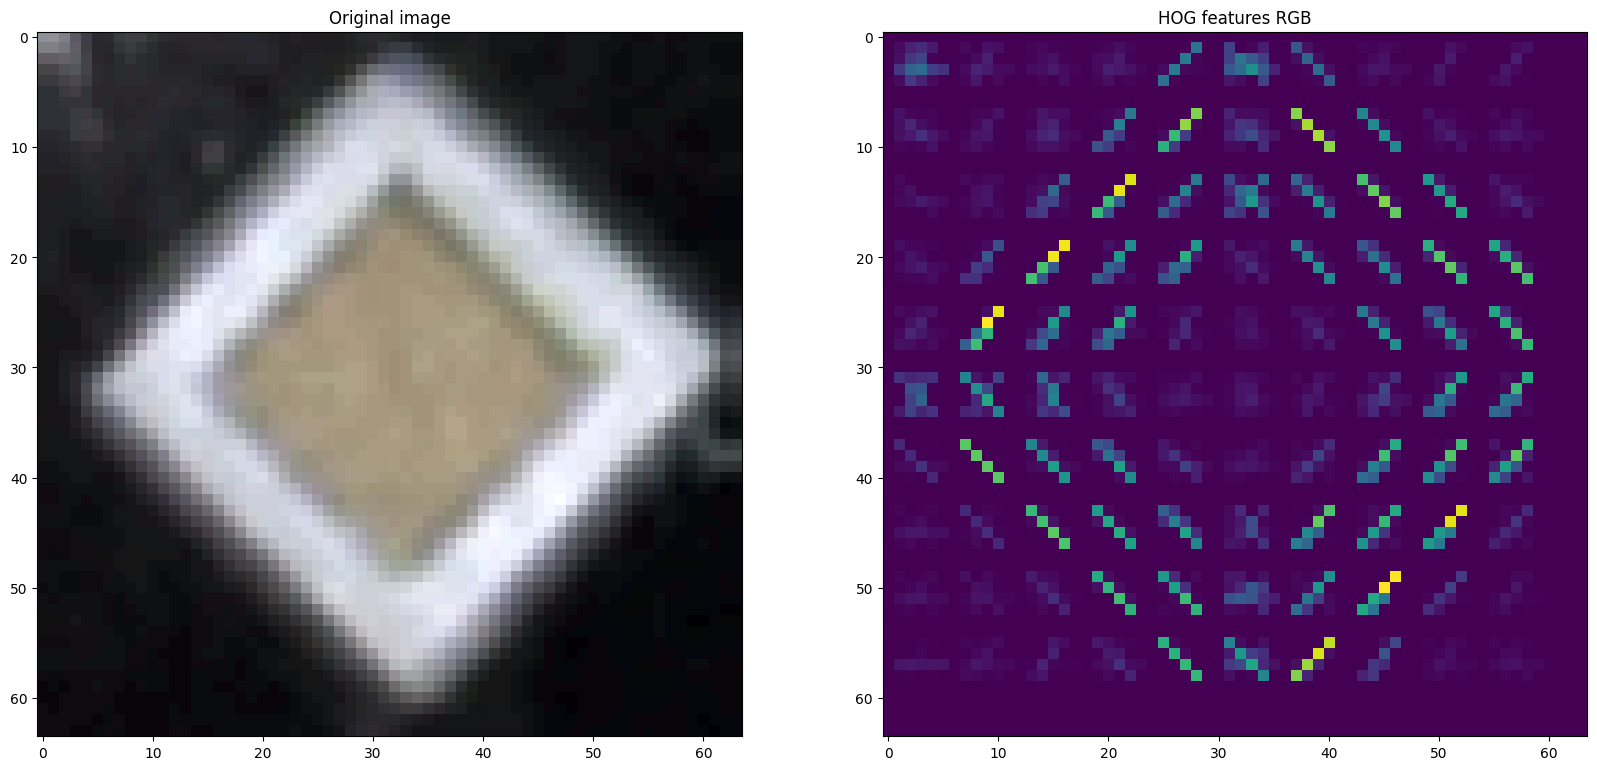

In [223]:
samples = dft.sample(100, with_replacement=False)

features_rgb, hog_image_rgb = create_hog_features(
    restore_image_from_list(
        samples["Scaled_Width"][0],
        samples["Scaled_Height"][0],
        samples["Stretched_Histogram_Image"][0],
    )
)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(
    image_for_display(
        restore_image_from_list(
            samples["Scaled_Width"][0],
            samples["Scaled_Height"][0],
            samples["Stretched_Histogram_Image"][0],
        )
    )
)
ax.set_title("Original image")
ax = fig.add_subplot(1, 2, 2)
ax.imshow(hog_image_rgb)
ax.set_title("HOG features RGB")